In [1]:
# Author: Brent Artuch
# Date: 2024-10-22

import sympy as sp
from sympy.physics.quantum import *
import numpy as np

from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

sp.init_printing()

## Tensor Products
4.3 - Calculate the following inner products: 
\begin{align*}
&\braket{10|11}\\
&\braket{+-|11}\\
&\braket{1+0|1-0}\\
\end{align*}

Answer:<br>
\begin{align*}
\braket{10|11}&=\braket{1|0} \cdot \braket{1|1}=1\cdot 0=0\\
\braket{+-|11}&=\braket{+|0} \cdot \braket{-|1}=\frac{1}{\sqrt{2}} \cdot -\frac{1}{\sqrt{2}}=-\frac{1}{2}\\
\braket{1+0|1-0}&=\braket{1|1} \cdot \braket{+|-} \cdot \braket{0|1}=0\cdot 1 \cdot 1=0
\end{align*}

In [2]:
# With Python

# Single-Qubit States
ket_zero = Statevector([1,0])
ket_one = Statevector([0,1])
ket_plus = Statevector([1/np.sqrt(2),1/np.sqrt(2)])
ket_minus = Statevector([1/np.sqrt(2),-1/np.sqrt(2)])

# Product States
ket_one_zero = ket_one.tensor(ket_zero)
ket_one_one = ket_one.tensor(ket_one)
ket_plus_minus = ket_plus.tensor(ket_minus)
ket_one_plus_zero = ket_one.tensor(ket_plus).tensor(ket_zero)
ket_one_minus_zero = ket_one.tensor(ket_minus).tensor(ket_zero)

# Inner Products
a = ket_one_zero.inner(ket_one_one).item().real
b = ket_plus_minus.inner(ket_one_one).item().real
c = ket_one_plus_zero.inner(ket_one_minus_zero).item().real

a,b,c

4.4 - Calculate $\ket{1}\otimes\ket{1}\otimes\ket{0}$ and draw it as a column vector.

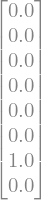

In [3]:
answer = ket_one.tensor(ket_one).tensor(ket_zero)

elements = []
for i in range(len(answer)):
    elements.append(answer[i].item().real)

vector = sp.Matrix(elements)
vector

4.5 - Consider the two-qubit state:
\begin{align*}
\ket{\psi}=\frac{1}{2}\ket{00}+\frac{i}{\sqrt{2}}\ket{10}+\frac{\sqrt{3}+i}{4}\ket{11}
\end{align*}
Express this state as a column vector and its conjugate row vector.

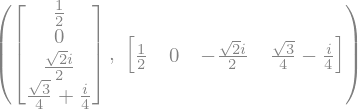

In [4]:
ket_psi = Statevector([1/2,0,1.0j/np.sqrt(2),((np.sqrt(3)+1.0j)/4)])

elements = []
for i in range(len(ket_psi)):
    elements.append(sp.nsimplify(ket_psi[i].item()))

column_vector = sp.Matrix(elements)

row_vector = Dagger(column_vector)

column_vector, row_vector

## Measuring Individual Qubits
4.7 - Two qubits are in the state:
\begin{align*}
\ket{\psi}=\frac{i}{\sqrt{10}}\ket{00}+\frac{1-2i}{\sqrt{10}}\ket{01}+\frac{e^{i\pi/100}}{\sqrt{10}}\ket{10}+\frac{\sqrt{3}}{\sqrt{10}}\ket{11}
\end{align*}

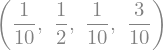

In [5]:
# Amplitudes
amplitude_00 = 1.0j/np.sqrt(10)
amplitude_01 = (1-2.0j)/np.sqrt(10)
amplitude_10 = (np.exp(1.0j*np.pi/100))/np.sqrt(10)
amplitude_11 = np.sqrt(3)/np.sqrt(10)

# Probabilities
prob_00 = sp.nsimplify(amplitude_00*sp.conjugate(amplitude_00))
prob_01 = sp.nsimplify(amplitude_01*sp.conjugate(amplitude_01))
prob_10 = sp.nsimplify(amplitude_10*sp.conjugate(amplitude_10))
prob_11 = sp.nsimplify(amplitude_11*sp.conjugate(amplitude_11))

prob_00,prob_01,prob_10,prob_11

4.8 - Normalize the following quantum state:
\begin{align*}
A\left(\frac{1}{2}\ket{00}+i\ket{01}+\sqrt{2}\ket{10}-\ket{11}\right)
\end{align*}

Answer: To normalize this state we need to solve for $A$ such that the amplitudes of the state have a total probability of $1$. 
\begin{align*}
1&=\left|\frac{1}{2}A\right|^2+|iA|^2+|\sqrt{2}A|^2+|-1A|^2\\
&=\frac{1}{4}|A|^2+|A|^2+2|A|^2+|A|^2\\
&=\frac{1}{4}|A|^2+\frac{4}{4}|A|^2+\frac{8}{4}|A|^2+\frac{4}{4}|A|^2\\
&=\frac{17}{4}|A|^2\\
|A|^2&=\frac{4}{17}\\
A&=\frac{2}{\sqrt{17}}
\end{align*}

## Sequential Single-Qubit Measurements
4.9 - Consider the two-qubit state:
\begin{align*}
\frac{1}{4}\ket{00}+\frac{1}{2}\ket{01}+\frac{1}{\sqrt{2}}\ket{10}+\frac{\sqrt{3}}{4}\ket{11}
\end{align*}
If you measure only the left qubit, what are the resulting states with what probabilities?<br>
Answer:
\begin{align*}
Pr(\text{ Left is }\ket{0})=\left|\frac{1}{4}\right|^2+\left|\frac{1}{2}\right|^2=\frac{1}{16}+\frac{1}{4}=\frac{5}{16}
\end{align*}
And the state collapses to:
\begin{align*}
\frac{1/4\ket{00}+1/2\ket{01}}{\sqrt{5/16}}=\frac{\sqrt{16}/4\ket{00}+\sqrt{16}/2\ket{01}}{\sqrt{5}}=\frac{1}{\sqrt{5}}\ket{00}+\frac{2}{\sqrt{5}}\ket{01}
\end{align*}

\begin{align*}
Pr(\text{ Left is }\ket{1})=\left|\frac{1}{\sqrt{2}}\right|^2+\left|\frac{\sqrt{3}}{4}\right|^2=\frac{1}{2}+\frac{3}{16}=\frac{11}{16}
\end{align*}
And the state collapses to:
\begin{align*}
\frac{1/\sqrt{2}\ket{10}+\sqrt{3}/4\ket{11}}{\sqrt{11/16}}=\frac{4/\sqrt{2}\ket{10}+4\sqrt{3}/4\ket{11}}{\sqrt{11}}=\frac{2\sqrt{2}}{\sqrt{11}}\ket{10}+\sqrt{\frac{3}{11}}\ket{11}
\end{align*}

In [6]:
# With Qiskit
psi = Statevector([1/4,1/2,1/np.sqrt(2),np.sqrt(3)/4])
display(psi.draw("latex"))
outcome, state = psi.measure([1])

prob_0 = psi[0]**2+psi[1]**2
prob_1 = psi[2]**2+psi[3]**2

print("The probability of the left qubit measuring 0: ", sp.nsimplify(prob_0.item().real))
print("The probability of the left qubit measuring 1: ", sp.nsimplify(prob_1.item().real))
print("")
print("Left qubit result: ",outcome.item())
display(state.draw("latex"))

<IPython.core.display.Latex object>

The probability of the left qubit measuring 0:  5/16
The probability of the left qubit measuring 1:  11/16

Left qubit result:  1


<IPython.core.display.Latex object>

4.10 - Consider the three qubit state:
\begin{align*}
\frac{1}{6}\ket{000}+\frac{1}{3\sqrt{2}}\ket{001}+\frac{1}{\sqrt{6}}\ket{010}+\frac{1}{2}\ket{011}+\frac{1}{6}\ket{100}+\frac{1}{3}\ket{101}+\frac{1}{6}\ket{110}+\frac{1}{\sqrt{3}}\ket{111}
\end{align*}
If you measure the right and the left but not the middle, what states do you get with what probabilities?<br>
Answer:

In [7]:
# With Qiskit

# This is slightly different because qiskit autmatically rationalizes the denominator of the amplitudes and the
# author did not which leads to different probability results, so the third element of the state vector has 
# been adjusted st the probabilities will sum to 0. 

psi = Statevector([1/6,np.sqrt(2)/6,1/np.sqrt(6),1/2,1/6,1/3,1/6,1/np.sqrt(3)])
display(psi.draw("latex"))
outcome, state = psi.measure([0,2])

prob_00 = psi[0]**2+psi[1]**2
prob_01 = psi[2]**2+psi[3]**2
prob_10 = psi[4]**2+psi[5]**2
prob_11 = psi[6]**2+psi[7]**2

print("The probability of the left qubit measuring 00: ", sp.nsimplify(prob_00.item().real))
print("The probability of the left qubit measuring 01: ", sp.nsimplify(prob_01.item().real))
print("The probability of the left qubit measuring 10: ", sp.nsimplify(prob_10.item().real))
print("The probability of the left qubit measuring 11: ", sp.nsimplify(prob_11.item().real))
print("")
print("Left qubit result: ",outcome.item())
display(state.draw("latex"))

<IPython.core.display.Latex object>

The probability of the left qubit measuring 00:  1/12
The probability of the left qubit measuring 01:  5/12
The probability of the left qubit measuring 10:  5/36
The probability of the left qubit measuring 11:  13/36

Left qubit result:  00


<IPython.core.display.Latex object>

4.11 - Product state or entangled state?<br>
a)
\begin{align*}
\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})
\end{align*}
Answer - First, we must list the cooresponding amplitudes:
\begin{align*}
\alpha_1\alpha_0=0\ , \ \alpha_1\beta_0=\frac{1}{\sqrt{2}}\ , \ \alpha_0\beta_1=\frac{1}{\sqrt{2}}\ , \ \beta_1\beta_0=0
\end{align*}

For the state to be seperable into a product state, the amplitudes must satisfy the condition:
\begin{align*}
&(\alpha_1\alpha_0)(\beta_1\beta_0)=(\alpha_1\beta_0)( \alpha_0\beta_1)\\
& \text{ * By the associative property of multiplication.}\\
&(\alpha_1\alpha_0)(\beta_1\beta_0)-(\alpha_1\beta_0)( \alpha_0\beta_1)=0
\end{align*}

Using this:
\begin{align*}
(0)(0)-\left(\frac{1}{\sqrt{2}}\right)\left(\frac{1}{\sqrt{2}}\right)=-\frac{1}{2}\not = 0
\end{align*}

Therefore, this is an entangled state.

b)
\begin{align*}
\frac{1}{\sqrt{2}}(\ket{10}+i\ket{11})
\end{align*}

\begin{align*}
\alpha_1\alpha_0=0\ , \ \alpha_1\beta_0=0\ , \ \alpha_0\beta_1=\frac{1}{\sqrt{2}}\ , \ \beta_1\beta_0=\frac{i}{\sqrt{2}}
\end{align*}

Now we can plug the values into the seperation condition:
\begin{align*}
(0)\left(\frac{i}{\sqrt{2}}\right)-(0)\left(\frac{1}{\sqrt{2}}\right)=0
\end{align*}

So, this is a product state and, by general observation, it appears to be the product of the $1$ state and $i$ state. Let's verify:
\begin{align*}
\ket{1}\ket{i}&=\ket{1}\otimes \frac{1}{\sqrt{2}}(\ket{0}+i\ket{1})\\
&=\frac{1}{\sqrt{2}}(\ket{1}\ket{0}+i\ket{1}\ket{1})\\
&=\frac{1}{\sqrt{2}}(\ket{10}+i\ket{11})
\end{align*}

4.12 - Product State or Entagled State?<br>
a)
\begin{align*}
\frac{1}{4}(3\ket{00}-\sqrt{3}\ket{01}+\sqrt{3}\ket{10}-\ket{11})
\end{align*}

\begin{align*}
\alpha_1\alpha_0=\frac{3}{4}\ , \ \alpha_1\beta_0=-\frac{\sqrt{3}}{4}\ , \ \alpha_0\beta_1=\frac{\sqrt{3}}{4}\ , \ \beta_1\beta_0=-\frac{1}{4}
\end{align*}

Now we can plug the values into the seperation condition:
\begin{align*}
\left(\frac{3}{4}\right)\left(-\frac{1}{4}\right)-\left(-\frac{\sqrt{3}}{4}\right)\left(\frac{\sqrt{3}}{4}\right)=-\frac{3}{16}+\frac{3}{16}=0
\end{align*}

Now that we know that this is a product state, let's factor it. First, we will solve for the individual $\alpha$ and $\beta$ variables:
\begin{align*}
\alpha_1&=\frac{3}{4\alpha_0}\\\\
\beta_0&=-\frac{\sqrt{3}}{4}\frac{4\alpha_0}{3}=-\frac{\alpha_0 \sqrt{3}}{3}\\\\
\beta_1&=\frac{\sqrt{3}}{4\alpha_0}
\end{align*}

Now we can use the fourth equation to verify our solutions:
\begin{align*}
\beta_1\beta_0=\left(\frac{\sqrt{3}}{4\alpha_0}\right)\left(-\frac{\alpha_0\sqrt{3}}{3}\right)=-\frac{3}{12}=-\frac{1}{4}
\end{align*}

Next, we plug the solved variables into the product state equation:
\begin{align*}
\ket{\psi_1}\ket{\psi_0}&=(\alpha_1\ket{0}+\beta_1\ket{1})(\alpha_0\ket{0}+\beta_0\ket{1})\\
&=\left(\frac{3}{4\alpha_0}\ket{0}+\frac{\sqrt{3}}{4\alpha_0}\ket{1}\right)\left(\alpha_0\ket{0}-\frac{\alpha_0 \sqrt{3}}{3}\ket{1}\right)\\
&=\frac{1}{\alpha_0}\left(\frac{3}{4}\ket{0}+\frac{\sqrt{3}}{4}\ket{1}\right)\alpha_0\left(\ket{0}-\frac{ \sqrt{3}}{3}\ket{1}\right)\\
&=\left(\frac{3}{4}\ket{0}+\frac{\sqrt{3}}{4}\ket{1}\right)\left(\ket{0}-\frac{ \sqrt{3}}{3}\ket{1}\right)\\
\end{align*}

Another reasanable answer by 'guess-and-check' factoring would be:
\begin{align*}
\left(\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}\right)\left(\frac{\sqrt{3}}{2}\ket{0}-\frac{1}{2}\ket{1}\right)
\end{align*}

b)
\begin{align*}
\frac{1}{\sqrt{3}}\ket{0}\ket{+}+\sqrt{\frac{2}{3}}\ket{1}\ket{-}
\end{align*}

First, we need to write $\ket{+}$ and $\ket{-}$ in terms of the $\{\ket{0},\ket{1}\}$ basis: 
\begin{align*}
\frac{1}{\sqrt{3}}\ket{0}\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})+\sqrt{\frac{2}{3}}\ket{1}\otimes\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})
\end{align*}

Next, distribute:
\begin{align*}
&\frac{1}{\sqrt{3}}\ket{0}\otimes\left(\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1}\right)+\sqrt{\frac{2}{3}}\ket{1}\otimes\left(\frac{1}{\sqrt{2}}\ket{0}-\frac{1}{\sqrt{2}}\ket{1}\right)\\
&=\frac{1}{\sqrt{2}\sqrt{3}}\ket{00}+\frac{1}{\sqrt{2}\sqrt{3}}\ket{01}+\frac{1}{\sqrt{3}}\ket{10}-\frac{1}{\sqrt{3}}\ket{11}\\
\end{align*}

\begin{align*}
\alpha_1\alpha_0=\frac{1}{\sqrt{2}\sqrt{3}}\ , \ \alpha_1\beta_0=\frac{1}{\sqrt{2}\sqrt{3}}\ , \ \alpha_0\beta_1=\frac{1}{\sqrt{3}}\ , \ \beta_1\beta_0=-\frac{1}{\sqrt{3}}
\end{align*}

Now we can plug the values into the seperation condition:
\begin{align*}
\left(\frac{1}{\sqrt{2}\sqrt{3}}\right)\left(-\frac{1}{\sqrt{3}}\right)-\left(\frac{1}{\sqrt{2}\sqrt{3}}\right)\left(\frac{1}{\sqrt{3}}\right)=-\frac{1}{3\sqrt{2}}-\frac{1}{3\sqrt{2}}\not=0
\end{align*}
Therefore, this is an entangled state.

4.13 - For each of the bell states, show that appling the $X$ gate to either qubit flips the state symbol of the bell state in question up to a global phase. (i.e. $\ket{\Phi^+}\rightarrow\ket{\Psi^+}$ or $\ket{\Phi^-}\rightarrow -\ket{\Psi^-}$).<br>
Answer:

In [8]:
# With Qiskit
ket_zero = Statevector([1, 0]) 
ket_one = Statevector([0, 1]) 

# Define H and CNOT gates
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
CX = Operator([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0]])

# Plus and minus states
ket_plus = ket_zero.evolve(H)
ket_minus = ket_one.evolve(H)

# Evaluate tensor products
ket_plus_zero = ket_plus.tensor(ket_zero)
ket_minus_zero = ket_minus.tensor(ket_zero)
ket_plus_one = ket_plus.tensor(ket_one)
ket_minus_one = ket_minus.tensor(ket_one)

# Apply the CNOT gate
phi_plus = ket_plus_zero.evolve(CX)
phi_minus = ket_minus_zero.evolve(CX)
psi_plus = ket_plus_one.evolve(CX)
psi_minus = ket_minus_one.evolve(CX)

bell_states = [phi_plus,phi_minus,psi_plus,psi_minus]

for state in bell_states:
    display(state.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
I = Operator([
    [1,0],
    [0,1]
])
X = Operator([
    [0,1],
    [1,0]
])

XI = X.tensor(I)
IX = I.tensor(X)

# Transform each bell state with XI operation
for state in bell_states:
    evolved_state = state.evolve(XI)
    display(evolved_state.draw("latex"))

# Transform each bell state with IX operation
for state in bell_states:
    evolved_state = state.evolve(IX)
    display(evolved_state.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Note: For two of these results we observe that the signs are incorrect. However, if we apply a global phase of $-1$, this will be corrected. That's why we can say that applying the $X$ operation flips the symbol for all bell states up to a global phase.